In [164]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [165]:
# Loading the dataset
df = pd.read_csv("dataframe_.csv")

In [166]:
# Returns number of rows and columns of the dataset
df.shape

(1697, 2)

In [167]:
# Returns an object with all of the column headers
df.columns

Index(['input', 'output'], dtype='object')

In [168]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

input     float64
output    float64
dtype: object

In [169]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [170]:
df["input"].value_counts()

-125.366669    11
 112.633331    10
-131.366669     8
-119.366669     8
 80.633331      7
               ..
-14.879573      1
-7.366669       1
 0.106496       1
 0.641190       1
-110.344221     1
Name: input, Length: 991, dtype: int64

In [171]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [172]:
# Returns true for a column having null values, else false
df.isnull().sum()

input     1
output    1
dtype: int64

In [174]:
df[df['output'].isnull()]

,input,output
1439,NaN,NaN


In [177]:
df.shape

(1697, 2)

In [180]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [181]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


Data Visualization

In [182]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\nirma\AppData\Local\Temp\ipykernel_560\970044403.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


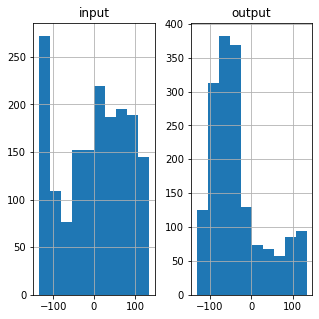

In [183]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
g = df.hist(ax=ax)

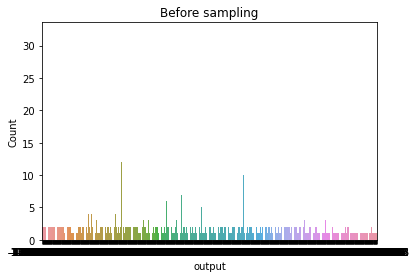

In [184]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='output', data=df)
plt.xlabel('output')
plt.ylabel('Count')
plt.title('Before sampling')
plt.show()

Feature Engineering

<AxesSubplot:>

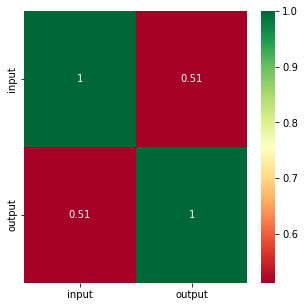

In [185]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 360x360 with 0 Axes>

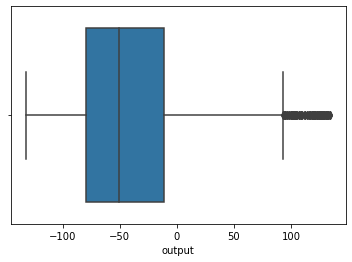

<Figure size 360x360 with 0 Axes>

In [186]:
#checking outliers
sns.boxplot(df['output'])
plt.figure(figsize=(5,5))

Feature Scaling

C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

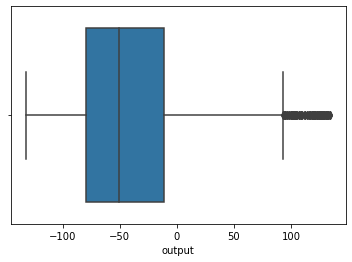

In [187]:
#checking outliers
sns.boxplot(df['output'])

# Understanding the data by plots

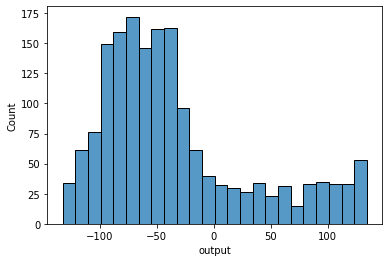

In [232]:
sns.histplot(data = df , x = 'output');

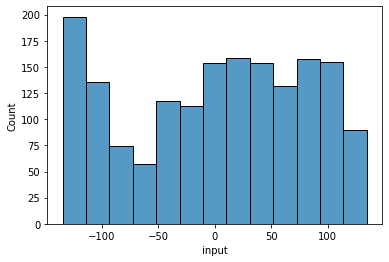

In [233]:
sns.histplot(data = df , x = 'input');

# Handling Missing Values

In [191]:
def replace_missing_value(df, number_features):

    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [192]:
number_features = ['median_income', 'gdp']

In [195]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [196]:
df.fillna(df.mean(), inplace=True)

In [197]:
df[:] = np.nan_to_num(df)

In [198]:
df.isnull().sum()

input     0
output    0
dtype: int64

# splitting the data

In [199]:
# Splitting the dataset into dependent and independent features
X = df.drop('output', axis=1)
y = df['output']

In [200]:
#splitting the data into Training data and Testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [201]:
print(X.shape,X_train.shape,X_test.shape)

(1697, 1) (1357, 1) (340, 1)


In [202]:
X_train.shape, y_train.shape

((1357, 1), (1357,))

In [203]:
X_test.shape, y_test.shape

((340, 1), (340,))

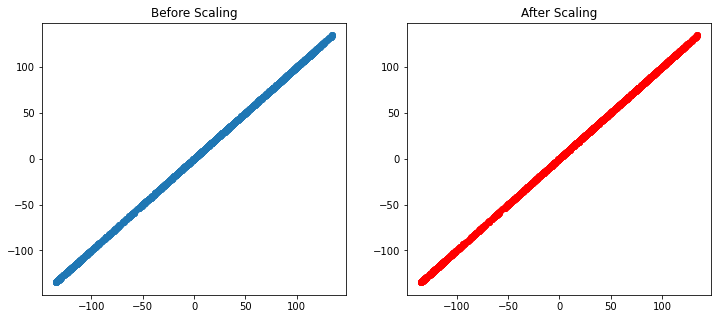

In [204]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train, X_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train, X_train,color='red')
ax2.set_title("After Scaling")
plt.show()


# below we can observe that the origin has changed after scaling 

In linear regression, there are several evaluation metrics that you can use to compare the performance of different models. Some common evaluation metrics for regression problems include:

Mean Squared Error (MSE): It is the average of the squared differences between the predicted and actual target values. Lower MSE values indicate a better fit.

Root Mean Squared Error (RMSE): It is the square root of the MSE. RMSE is a more interpretable metric as it is expressed in the same units as the target variable.

R-squared: It is a measure of how well the linear regression model fits the data. It takes values between 0 and 1, with higher values indicating a better fit.

Mean Absolute Error (MAE): It is the average of the absolute differences between the predicted and actual target values. Lower MAE values indicate a better fit.

# Applying  Linear Regression model

In [205]:
#Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [206]:
#  Make Prediction
y_pred = regressor.predict(X_test)

In [207]:
y_pred.shape

(340,)

In [208]:
# Train Score
training_data_model_score = regressor.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Training data 0.25637418626919306


In [209]:
testing_data_model_score = regressor.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

Model Score/Performance on Testing data 0.2791574683421363


In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [222]:
# initialize the model
model1 = LinearRegression()

In [223]:
# fit the model on the training set
model1.fit(X_train, y_train)

LinearRegression()

In [224]:
# make predictions on the test set
y_pred = model1.predict(X_test)

In [225]:
# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [226]:
print("Model 1 Evaluation Metrics:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)
print("\n")

Model 1 Evaluation Metrics:
MSE:  3264.190704395876
RMSE:  57.13309640126182
MAE:  43.24308667144146
R-squared:  0.2791574683421363




In [227]:
# initialize another model
model2 = LinearRegression()

In [228]:
# fit the model on the training set
model2.fit(X_train, y_train)

LinearRegression()

In [229]:
# make predictions on the test set
y_pred = model2.predict(X_test)

In [230]:
# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [231]:
print("Model 2 Evaluation Metrics:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

Model 2 Evaluation Metrics:
MSE:  3264.190704395876
RMSE:  57.13309640126182
MAE:  43.24308667144146
R-squared:  0.2791574683421363


In this code, we use the LinearRegression class from the scikit-learn library to implement linear regression. The code calculates the MSE, RMSE, MAE, and R-squared for two models (model1 and model2) on the test set. Finally, it prints the evaluation metrics for both models, which can be compared to determine which model is better.

To determine why one model is better than the other, you can compare the coefficients of the models, which indicate the importance of each feature in the model. You can also plot the residuals for each model and examine if there are any patterns, which can suggest that the model is not capturing the underlying relationship between the features and the target variable well.




Regenerate response

# Hyperparameter Tuning

In [211]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [212]:
# create a grid of hyperparameters
param_grid = {'alpha': np.logspace(-5, 5, 11), 'normalize': [True, False]}

In [213]:
# initialize the model
ridge = Ridge()

In [215]:
# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\nirma\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\nirma\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'normalize': [True, False]})

In [216]:
# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'alpha': 1000.0, 'normalize': False}


In [217]:
# evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test score: ", test_score)

Test score:  0.27915397880196424


In [218]:
# perform grid search with 5-fold cross-validation
grid_search1 = GridSearchCV(ridge, param_grid, cv=10)
grid_search1.fit(X_train, y_train)

C:\Users\nirma\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\nirma\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'normalize': [True, False]})

In [219]:
# print the best hyperparameters
print("Best hyperparameters: ", grid_search1.best_params_)

Best hyperparameters:  {'alpha': 10000.0, 'normalize': False}


In [220]:
# evaluate the model on the test set
test_score = grid_search1.score(X_test, y_test)
print("Test score: ", test_score)

Test score:  0.2791222844381557


# Conclusion

In conclusion, linear regression is a simple and powerful technique for modeling the relationship between a dependent variable and one or more independent variables. It can be used for both simple linear regression (one independent variable) and multiple linear regression (multiple independent variables). The goal of linear regression is to find the best-fitting line that minimizes the residual sum of squares between the observed values and the predicted values.

In practice, linear regression is often used as a starting point for more complex models and is often combined with feature engineering, regularization, and other techniques to improve its performance. Feature engineering involves creating new features or transforming existing features to improve the performance of the model, while regularization is a technique for preventing overfitting by adding a penalty term to the loss function.

The performance of a linear regression model can be evaluated using metrics such as mean squared error, mean absolute error, R-squared, and adjusted R-squared. By comparing different models using these metrics, it is possible to determine which model is the best-fitting for the data.

In summary, linear regression is a useful tool for understanding and modeling relationships in data, and it is widely used in a variety of applications, including finance, marketing, and medical research.
         
         
         
         Thank You...!!



